In [143]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',300)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
# Data Link: http://ocslab.hksecurity.net/Datasets/driving-dataset
# maybe more data: https://www.kaggle.com/data/27093

In [144]:
obd_data = pd.read_csv('ten_drivers.csv')
obd_data = obd_data.drop(['Time(s)'], axis=1)

In [145]:
print(obd_data.shape)
obd_data.head()

(94380, 53)


,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,Fuel_Pressure,Long_Term_Fuel_Trim_Bank1,Engine_speed,Engine_torque_after_correction,Torque_of_friction,Flywheel_torque_(after_torque_interventions),Current_spark_timing,Engine_coolant_temperature,Engine_Idel_Target_Speed,Engine_torque,Calculated_LOAD_value,Minimum_indicated_engine_torque,Maximum_indicated_engine_torque,Flywheel_torque,Torque_scaling_factor(standardization),Standard_Torque_Ratio,Requested_spark_retard_angle_from_TCU,TCU_requests_engine_torque_limit_(ETL),TCU_requested_engine_RPM_increase,Target_engine_speed_used_in_lock-up_module,Glow_plug_control_request,Activation_of_Air_compressor,Torque_converter_speed,Current_Gear,Engine_coolant_temperature.1,Wheel_velocity_front_left-hand,Wheel_velocity_rear_right-hand,Wheel_velocity_front_right-hand,Wheel_velocity_rear_left-hand,Torque_converter_turbine_speed_-_Unfiltered,Clutch_operation_acknowledge,Converter_clutch,Gear_Selection,Vehicle_speed,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,0,-0.8,929,5.5,9.0,-5.9,-8.6,95,650,5.5,23.9,2.0,58.2,-5.9,230,1,15,508,0.0,3040,0,0,939.3,0,87,0.0,0.0,0.0,0.0,935.5,1,0,0,0,-8.5,1,325.5,0.0,-8.8,0,-3.4,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,0,-0.8,726,7.0,7.8,1.7,-11.3,95,670,7.0,30.6,2.0,53.9,1.8,230,1,15,508,0.0,3040,0,0,710.0,0,87,0.0,0.0,0.0,0.0,709.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,A,1
2,217.6,0.0,5.2,0.0,41,0,13.7,3,0,0,0,-0.8,685,7.0,7.4,-3.0,-12.8,95,670,7.0,31.8,2.0,53.1,-2.8,230,1,15,508,0.0,3040,0,0,663.3,0,87,0.0,0.0,0.0,0.0,663.5,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,A,1
3,204.8,0.0,4.7,0.0,38,0,13.3,3,0,0,0,-0.8,675,7.0,6.6,-1.3,-9.8,95,670,7.0,29.0,2.0,53.1,-1.2,230,1,15,508,0.0,3040,0,0,652.5,0,87,0.0,0.0,0.0,0.0,653.0,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.6,A,1
4,217.6,0.0,5.7,0.0,40,0,13.7,3,0,0,0,-0.8,716,8.2,11.3,-15.6,-7.9,95,670,8.2,30.2,2.0,53.5,-15.9,230,1,15,508,0.0,3040,0,1,692.5,0,87,0.0,0.0,0.0,0.0,693.8,1,0,0,0,0.1,1,0.9,0.0,-0.2,0,-3.5,A,1


In [146]:
# obd_data.columns.values # print all features

<h3> Remove offset of Engine_speed </h3>

In [147]:
OFFSET = 648 # it's the same for all drivers
# plt.figure(figsize=(20,8))
# plt.scatter(np.arange(obd_data.shape[0]), obd_data.Engine_speed-648)
# plt.show()
# print(np.min(obd_data.Engine_speed[:50]))
obd_data.Engine_speed = obd_data.Engine_speed - OFFSET

In [148]:
np.unique(obd_data.Class).shape # the 10 drivers are the 10 classes

(10,)

<h1> Data preparation </h1>

In [149]:
drivers = driver0, driver1, driver2, driver3, driver4, driver5, driver6, driver7, driver8, driver9 = [obd_data.loc[np.where(obd_data.Class == class_letter)[0]].drop('Class',axis=1) for class_letter in np.unique(obd_data.Class)]
#for driver in drivers:
#    driver = driver
drive_times = [d.shape[0] for d in drivers]
x = [np.arange(drive_time) for drive_time in drive_times]
print("Driving seconds of each driver:", drive_times)

Driving seconds of each driver: [7240, 12864, 7500, 13244, 8436, 11012, 7492, 9880, 7808, 8904]


<h1> Bad driving feature extraction </h1>

<h1> 1. RPM (Q3)</h1>

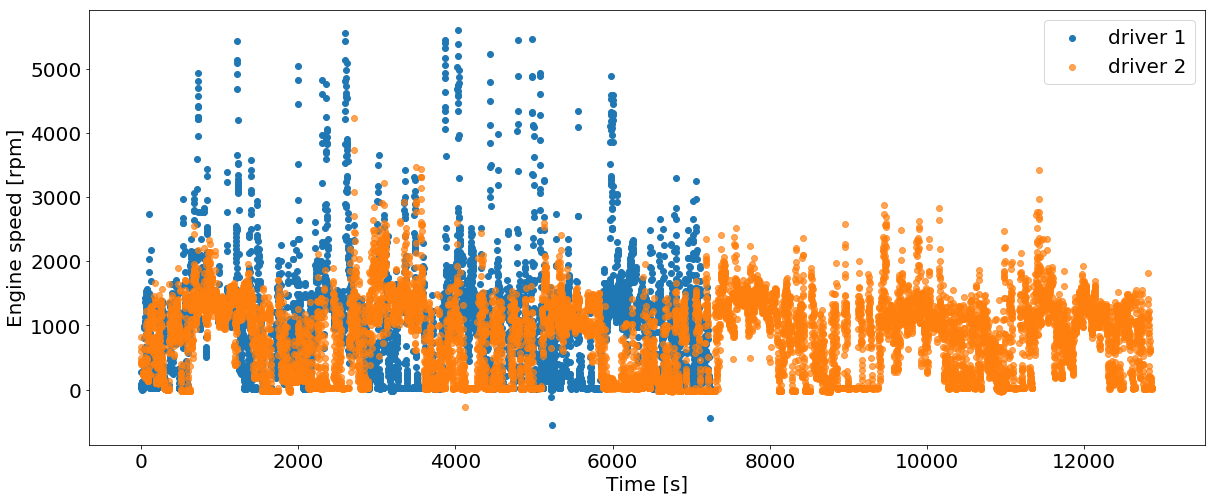

In [130]:
# RPM:
plt.figure(figsize=(20,8))
plt.scatter(x[0], driver0.Engine_speed, label="driver 1")
plt.scatter(x[1], driver1.Engine_speed, label="driver 2", alpha=0.7)
plt.xlabel("Time [s]")
plt.ylabel("Engine speed [rpm]")
plt.legend()
plt.show()

In [116]:
# Q3 of RPM (drehzahl) when its higher than value (car driving...)
max_engine_speed = np.max(obd_data.Engine_speed)
print("Q3 driver1:", np.percentile(driver0.Engine_speed, 75)/max_engine_speed)
print("Q3 driver2:", np.percentile(driver1.Engine_speed, 75)/max_engine_speed)
print("Higher value implies worse driving behaviour")

Q3 driver1: 0.24210526315789474
Q3 driver2: 0.22444246208742194
Higher value implies worse driving behaviour


<h1> 2. Stering wheel speed (Q3)</h1>

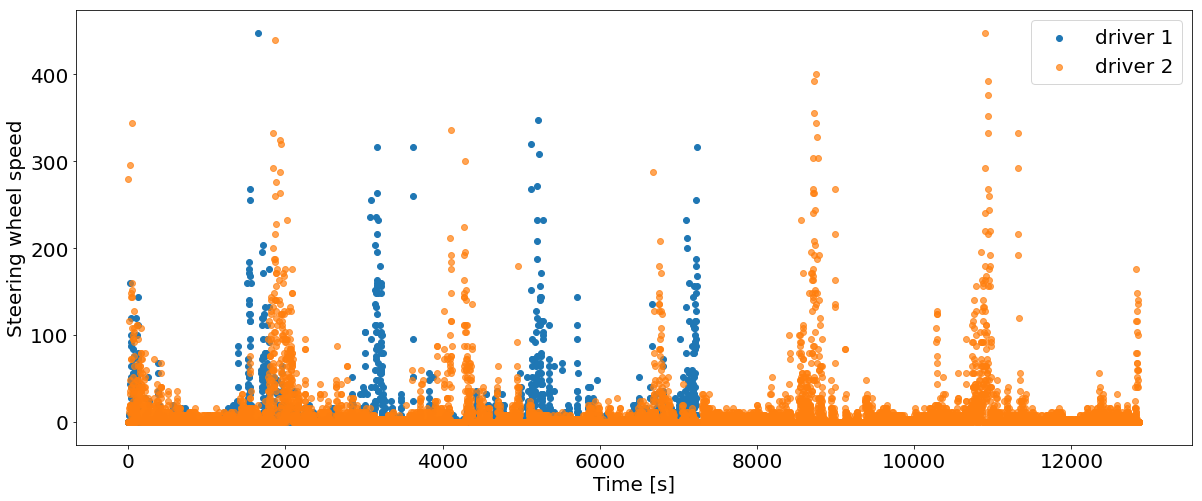

In [117]:
plt.figure(figsize=(20,8))
plt.scatter(x[0],driver0.Steering_wheel_speed, label="driver 1")
plt.scatter(x[1],driver1.Steering_wheel_speed, label="driver 2", alpha=0.7)
plt.xlabel("Time [s]")
plt.ylabel("Steering wheel speed")
plt.legend()
plt.show()

In [118]:
max_wheel_speed = np.max(obd_data.Steering_wheel_speed)
print("Q3 driver1:", np.percentile(driver0.Steering_wheel_speed, 98)/max_wheel_speed) # percentage of the sample that falls below this observation
print("Q3 driver2:", np.percentile(driver1.Steering_wheel_speed, 98)/max_wheel_speed)
print("Higher value implies worse driving behaviour")

Q3 driver1: 0.13924050632911392
Q3 driver2: 0.14556962025316456
Higher value implies worse driving behaviour


<h1> 3. Stering wheel angle (std) </h1>
standard deviation

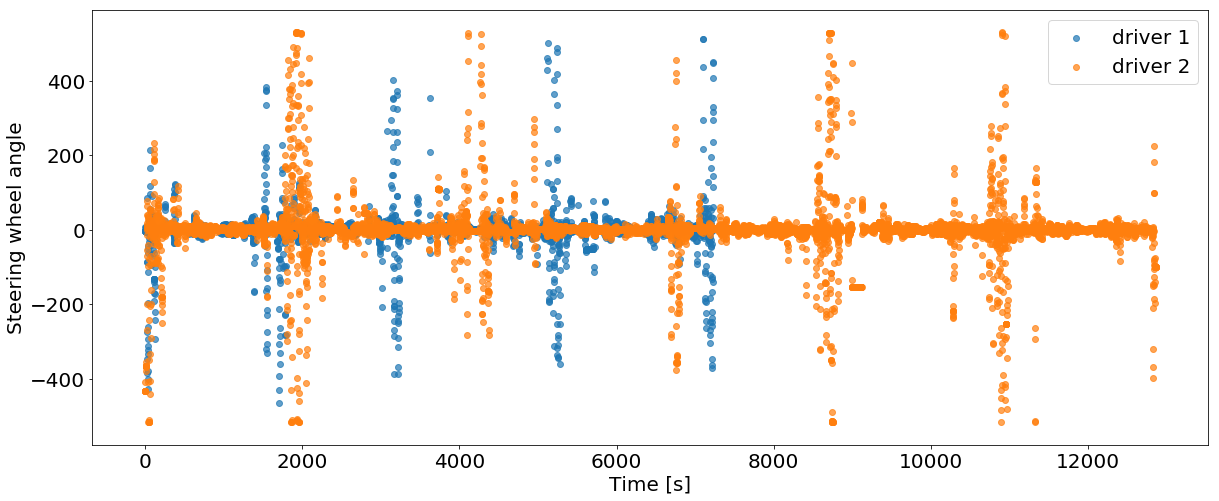

In [119]:
plt.figure(figsize=(20,8))
plt.scatter(x[0],driver0.Steering_wheel_angle, label="driver 1", alpha=0.7)
plt.scatter(x[1],driver1.Steering_wheel_angle, label="driver 2", alpha=0.7)
plt.xlabel("Time [s]")
plt.ylabel("Steering wheel angle")
plt.legend()
plt.show()

In [120]:
print("std driver1:", np.std(driver0.Steering_wheel_angle)/100) # percentage of the sample that falls below this observation
print("std driver2:", np.std(driver1.Steering_wheel_angle)/100)
print("Higher value implies worse driving behaviour")

std driver1: 0.47627772071788405
std driver2: 0.6626156545567831
Higher value implies worse driving behaviour


<h1> 4. Vehicle speed: (threshold)</h1>

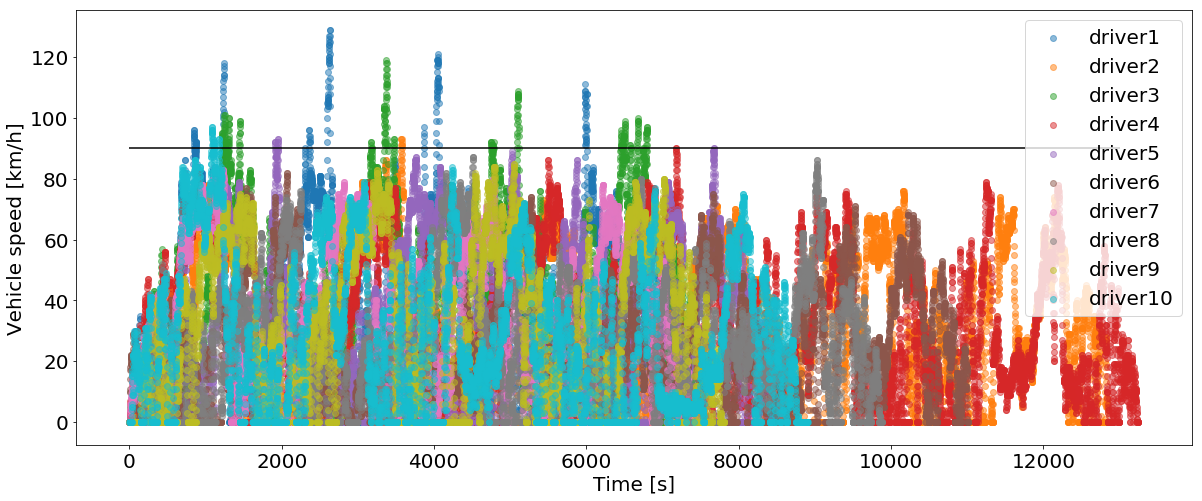

In [121]:
plt.figure(figsize=(20,8))
for i, (xx, driver) in enumerate(zip(x, drivers)):
    plt.scatter(xx, driver.Vehicle_speed, label='driver'+str(i+1), alpha=0.5)
plt.xlabel("Time [s]")
plt.ylabel("Vehicle speed [km/h]")
plt.legend()
plt.hlines(90, 0, 13000) # Limit = 90
plt.show()

In [122]:
LIMIT = 90
for driver in drivers:
    print(np.sum(driver.Vehicle_speed > LIMIT) > 10) # more than 10 seconds over 90 km/h
print("True is bad, False is good")

True
False
True
False
False
False
False
False
False
True
True is bad, False is good


<h1> 5. Acceleration speed - Longitudinal: (Q3) </h1>

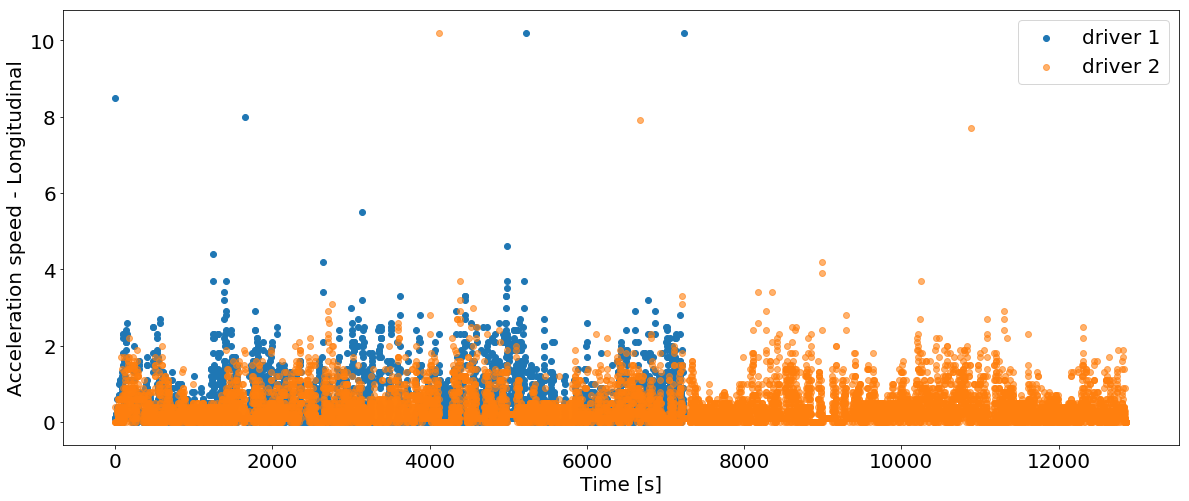

In [123]:
plt.figure(figsize=(20,8))
plt.scatter(x[0],np.abs(driver0['Acceleration_speed_-_Longitudinal']), label="driver 1")
plt.scatter(x[1],np.abs(driver1['Acceleration_speed_-_Longitudinal']), label="driver 2", alpha=0.6)
plt.xlabel("Time [s]")
plt.ylabel("Acceleration speed - Longitudinal")
plt.legend()
plt.show()

In [124]:
max_acc_long = np.max(obd_data['Acceleration_speed_-_Longitudinal'])
print("Q3 driver1:", np.percentile(np.abs(driver0['Acceleration_speed_-_Longitudinal']), 80)/max_acc_long) # percentage of the sample that falls below this observation
print("Q3 driver2:", np.percentile(np.abs(driver1['Acceleration_speed_-_Longitudinal']), 80)/max_acc_long)
print("Higher value implies worse driving behaviour")

Q3 driver1: 0.09876543209876544
Q3 driver2: 0.07407407407407407
Higher value implies worse driving behaviour


<h1> 6. Throttle position: (Q3) </h1>

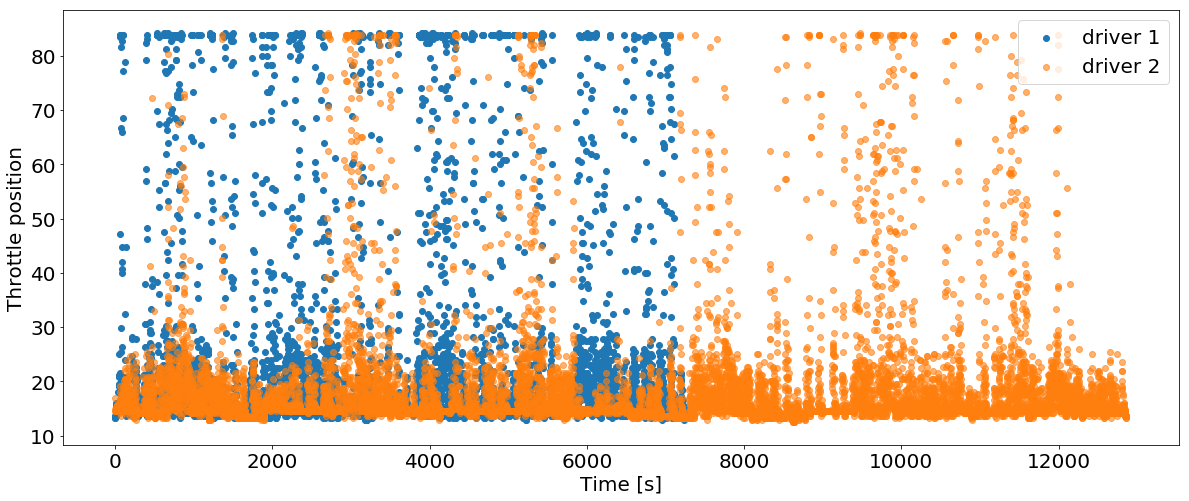

In [125]:
# Absolute_throttle_position = position of the gas pedal
plt.figure(figsize=(20,8))
# plt.scatter(x[0],np.abs(driver0['Absolute_throttle_position']), label="driver 1 throttle pos")
# plt.scatter(x[0],np.abs(driver0['Engine_speed']/np.max(driver0['Engine_speed'])*70+13), label="driver 1 engine speed")
plt.scatter(x[0],np.abs(driver0['Absolute_throttle_position']), label="driver 1")
plt.scatter(x[1],np.abs(driver1['Absolute_throttle_position']), label="driver 2", alpha=0.6) 

# plt.scatter(x[1],np.abs(driver1['Absolute_throttle_position']), label="driver 2", alpha=0.6)
plt.xlabel("Time [s]")
plt.ylabel("Throttle position")
plt.legend()
plt.show()

In [126]:
max_throttle = np.max(obd_data.Absolute_throttle_position)
#print("max (for norm):",max_throttle)
print("Q3 driver1:", np.percentile(np.abs(driver0['Absolute_throttle_position']), 80)/max_throttle) # percentage of the sample that falls below this observation
print("Q3 driver2:", np.percentile(np.abs(driver1['Absolute_throttle_position']), 80)/max_throttle)
print("Higher value implies worse driving behaviour")

Q3 driver1: 0.28825622775800713
Q3 driver2: 0.23250296559905104
Higher value implies worse driving behaviour


<h1> 7. Fuel consumption: (Q3) </h1>

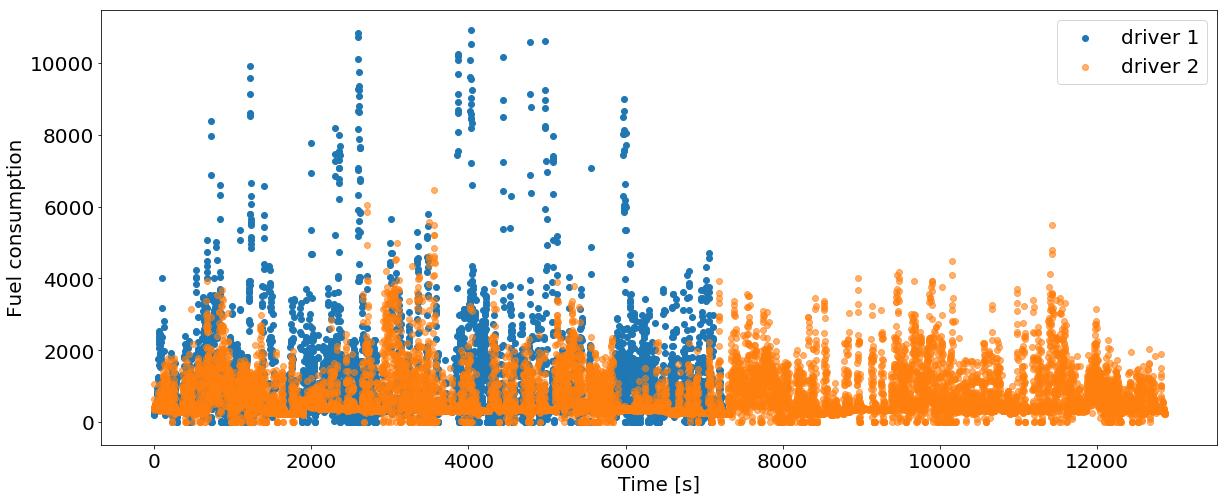

In [131]:
plt.figure(figsize=(20,8))
plt.scatter(x[0],driver0.Fuel_consumption, label="driver 1")
plt.scatter(x[1],driver1.Fuel_consumption, label="driver 2", alpha=0.6) 
plt.xlabel("Time [s]")
plt.ylabel("Fuel consumption")
plt.legend()
plt.savefig('Fuel_consumption_2_drivers.png')
plt.show()

In [128]:
max_fuel_cons = np.max(obd_data.Fuel_consumption)
print("Q3 driver1",  np.percentile(driver0.Fuel_consumption/max_fuel_cons, 80))# percentage of the sample that falls below this observation
print("Q3 driver2:", np.percentile(driver1.Fuel_consumption/max_fuel_cons, 80))
print("Higher value implies worse driving behaviour")

Q3 driver1 0.14988290398126464
Q3 driver2: 0.10538641686182669
Higher value implies worse driving behaviour


In [39]:
## Features that didn't work:
# Engine coolant temperature
# (a lot of speed changes)

<h1> Save driver tables for database </h1>

In [152]:
# Complete data:
for i, driver in enumerate(drivers):
    driver.to_csv("driver_"+str(i+1)+".csv")

In [153]:
# Only relevant features:
drop_features = ['Accelerator_Pedal_value',
       'Throttle_position_signal', 'Short_Term_Fuel_Trim_Bank1',
       'Intake_air_pressure', 'Filtered_Accelerator_Pedal_value', 'Engine_soacking_time',
       'Inhibition_of_engine_fuel_cut_off', 'Engine_in_fuel_cut_off',
       'Fuel_Pressure', 'Long_Term_Fuel_Trim_Bank1',
       'Engine_torque_after_correction', 'Torque_of_friction',
       'Flywheel_torque_(after_torque_interventions)',
       'Current_spark_timing', 'Engine_coolant_temperature',
       'Engine_Idel_Target_Speed', 'Engine_torque',
       'Calculated_LOAD_value', 'Minimum_indicated_engine_torque',
       'Maximum_indicated_engine_torque', 'Flywheel_torque',
       'Torque_scaling_factor(standardization)', 'Standard_Torque_Ratio',
       'Requested_spark_retard_angle_from_TCU',
       'TCU_requests_engine_torque_limit_(ETL)',
       'TCU_requested_engine_RPM_increase',
       'Target_engine_speed_used_in_lock-up_module',
       'Glow_plug_control_request', 'Activation_of_Air_compressor',
       'Torque_converter_speed', 'Current_Gear',
       'Engine_coolant_temperature.1', 'Wheel_velocity_front_left-hand',
       'Wheel_velocity_rear_right-hand',
       'Wheel_velocity_front_right-hand', 'Wheel_velocity_rear_left-hand',
       'Torque_converter_turbine_speed_-_Unfiltered',
       'Clutch_operation_acknowledge', 'Converter_clutch',
       'Gear_Selection',
       'Indication_of_brake_switch_ON/OFF', 'Master_cylinder_pressure',
       'Calculated_road_gradient', 'Acceleration_speed_-_Lateral',
       'PathOrder']
for i, driver in enumerate(drivers):
    driver.drop(drop_features, axis=1).to_csv("driver_"+str(i+1)+".csv")